In [1]:
pwd

'/Lun2/rzz/kaldi-master/egs/zhiyong/GREAT_ASV_system/train/debug'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
import sys
sys.path.append('/Lun2/rzz/kaldi-master/egs/zhiyong/GREAT_ASV_system/train/debug' + '/../')

import time
import importlib

import torch
import training_utils
from torch.utils.data import *
from my_dataloader import *
from read_data import *
import config.config_debug as config
importlib.reload(config)
from model_bank import *

/home/dell/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [26]:
train_data = PickleDataSet_single('/Lun0/zhiyong/sdsvc_full_488_dataset/source_vox_7323_fulltrain.csv')
train_dataloader = My_DataLoader(train_data, batch_size=128, shuffle=False, \
sampler=SequentialSampler(train_data), \
batch_sampler=None, num_workers=8, collate_fn=None, \
pin_memory=False, drop_last=False, timeout=0, \
worker_init_fn=None, multiprocessing_context=None)

In [53]:
train_data = PickleDataSet('/Lun0/zhiyong/dataset/tmp_data_csv.csv')
train_dataloader = My_DataLoader(train_data, batch_size=None, shuffle=False, \
sampler=SequentialSampler(train_data), \
batch_sampler=None, num_workers=8, collate_fn=None, \
pin_memory=False, drop_last=False, timeout=0, \
worker_init_fn=None, multiprocessing_context=None)

In [67]:
train_data = PickleDataSet_single('/Lun0/zhiyong/sdsvc_full_488_dataset/target_sdsvc_488_fulltrain.csv')
train_dataloader = My_DataLoader(train_data, batch_size=128, shuffle=False, \
sampler=SequentialSampler(train_data), \
batch_sampler=None, num_workers=8, collate_fn=None, \
pin_memory=False, drop_last=False, timeout=0, \
worker_init_fn=None, multiprocessing_context=None)

In [97]:
train_data = PickleDataSet_single('/Lun0/zhiyong/sdsvc_full_488_dataset/source_vox_7323_fulltrain_fixed.csv')
train_dataloader = My_DataLoader(train_data, batch_size=128, shuffle=False, \
sampler=SequentialSampler(train_data), \
batch_sampler=None, num_workers=8, collate_fn=None, \
pin_memory=False, drop_last=False, timeout=0, \
worker_init_fn=None, multiprocessing_context=None)

In [40]:
p_count_dict = {}
for i in range(len(train_data.spkid2utt[0])):
    
    la = train_data.spkid2utt[0][i].split('/')[-1][0]
    if la not in p_count_dict.keys():
        p_count_dict[la] = 1
    else:
        p_count_dict[la] += 1

In [41]:
p_count_dict

{'0': 1098450,
 '1': 1098450,
 '2': 1098450,
 '3': 1098450,
 '4': 1098450,
 '5': 1098450,
 '6': 1098450,
 '7': 1098450,
 '8': 1098450,
 '9': 1098450}

In [98]:
count_dict_2 = {}
for count, [_, batch_label] in enumerate(train_dataloader):
    batch_label = batch_label.numpy()
    for i in batch_label:
        if i not in count_dict_2.keys():
            count_dict_2[i] = 1
        else:
            count_dict_2[i] += 1
    if (count+1) % 100 == 0:
        print(count+1)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [27]:
count_dict = {}
for count, [_, batch_label] in enumerate(train_dataloader):
    batch_label = batch_label.numpy()
    for i in batch_label:
        if i not in count_dict.keys():
            count_dict[i] = 1
        else:
            count_dict[i] += 1
    if (count+1) % 100 == 0:
        print(count+1)

99
199
299
399
499
599
699
799
899
999
1099
1199
1299
1399
1499
1599
1699
1799
1899
1999
2099
2199
2299
2399
2499
2599
2699
2799
2899
2999
3099
3199
3299
3399
3499
3599
3699
3799
3899
3999
4099
4199
4299
4399
4499
4599
4699
4799
4899
4999
5099
5199
5299
5399
5499
5599
5699
5799
5899
5999
6099
6199
6299
6399
6499
6599
6699
6799
6899
6999
7099
7199
7299
7399
7499
7599
7699
7799
7899
7999
8099
8199
8299
8399
8499
8599
8699
8799
8899
8999
9099
9199
9299
9399
9499
9599
9699
9799
9899
9999
10099
10199
10299
10399
10499
10599
10699
10799
10899
10999
11099
11199
11299
11399
11499
11599
11699
11799
11899
11999
12099
12199
12299
12399
12499
12599
12699
12799
12899
12999
13099
13199
13299
13399
13499
13599
13699
13799
13899
13999
14099
14199
14299
14399
14499
14599
14699
14799
14899
14999
15099
15199
15299
15399
15499
15599
15699
15799
15899
15999
16099
16199
16299
16399
16499
16599
16699
16799
16899
16999
17099
17199
17299
17399
17499
17599
17699
17799
17899
17999
18099
18199
18299
18399
18499
1

In [99]:
count_dict_2

{3263: 1500,
 5336: 1500,
 1537: 1500,
 3154: 1500,
 5701: 1500,
 5764: 1500,
 1582: 1500,
 2072: 1500,
 6650: 1500,
 5658: 1500,
 6740: 1500,
 3477: 1500,
 2753: 1500,
 6212: 1500,
 6438: 1500,
 2077: 1500,
 1931: 1500,
 6368: 1500,
 6247: 1500,
 3588: 1500,
 5878: 1500,
 996: 1500,
 453: 1500,
 6677: 1500,
 2354: 1500,
 1299: 1500,
 5711: 1500,
 938: 1500,
 1720: 1500,
 6125: 1500,
 4706: 1500,
 6955: 1500,
 6729: 1500,
 5698: 1500,
 1688: 1500,
 5702: 1500,
 2510: 1500,
 5439: 1500,
 6346: 1500,
 980: 1500,
 6229: 1500,
 5902: 1500,
 2108: 1500,
 2286: 1500,
 2460: 1500,
 5919: 1500,
 7188: 1500,
 5621: 1500,
 6431: 1500,
 125: 1500,
 1183: 1500,
 4415: 1500,
 408: 1500,
 3683: 1500,
 6842: 1500,
 3380: 1500,
 822: 1500,
 1803: 1500,
 3607: 1500,
 2750: 1500,
 5603: 1500,
 1284: 1500,
 4282: 1500,
 7274: 1500,
 5312: 1500,
 4003: 1500,
 2187: 1500,
 3895: 1500,
 2734: 1500,
 2281: 1500,
 1876: 1500,
 4743: 1500,
 1206: 1500,
 169: 1500,
 1197: 1500,
 5240: 1500,
 502: 1500,
 5740: 1

In [28]:
count_dict

{3425: 900,
 561: 1500,
 4766: 900,
 5290: 900,
 434: 1500,
 2347: 900,
 5728: 3900,
 184: 1500,
 2740: 2700,
 7039: 900,
 1113: 1500,
 4917: 900,
 1673: 1500,
 3962: 1500,
 3368: 2700,
 871: 1500,
 323: 1500,
 4600: 3900,
 3060: 2700,
 5143: 900,
 4139: 900,
 1566: 1500,
 1943: 1500,
 3771: 900,
 5688: 3900,
 3866: 1500,
 575: 1500,
 516: 1500,
 2524: 2700,
 4771: 900,
 5599: 900,
 3363: 900,
 6409: 900,
 822: 1500,
 2213: 900,
 4723: 900,
 848: 1500,
 1965: 1500,
 4020: 2700,
 6786: 900,
 6532: 2700,
 2352: 2700,
 7317: 900,
 23: 1500,
 885: 1500,
 3037: 900,
 1289: 1500,
 1522: 1500,
 3662: 1500,
 3574: 1500,
 511: 1500,
 2733: 900,
 5825: 900,
 2421: 900,
 3974: 1500,
 6115: 900,
 389: 1500,
 1348: 1500,
 1442: 1500,
 6805: 900,
 989: 1500,
 7260: 2700,
 388: 1500,
 7307: 900,
 119: 1500,
 6275: 900,
 6650: 900,
 3870: 1500,
 4349: 900,
 5214: 900,
 2198: 1500,
 359: 1500,
 5983: 900,
 683: 1500,
 478: 1500,
 5666: 900,
 2801: 900,
 5055: 900,
 4498: 900,
 5273: 900,
 1558: 1500,
 

In [100]:
to = 0
num_list = {}
for i in range(len(count_dict_2)):
    print(count_dict_2[i])
    to += count_dict_2[i]
    if count_dict_2[i] not in num_list:
        num_list[count_dict_2[i]] = 1
    else:
        num_list[count_dict_2[i]] += 1

1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500


1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500


1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500


1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500


In [101]:
num_list

{1500: 7323}

In [60]:
to = 0
num_list = {}
for i in range(len(count_dict)):
    print(count_dict[i])
    to += count_dict[i]
    if count_dict[i] not in num_list:
        num_list[count_dict[i]] = 1
    else:
        num_list[count_dict[i]] += 1
#     if count_dict[i] != 1500:
#         print(i)
#         break

1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500


1500
1500
1500
1500
1500
1500
1500
1500
1500
2100
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2700
900
1500
900
2

900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
900
900
900
3900
900
900
900
2700
9

In [61]:
num_list

{900: 3444, 1500: 2560, 2100: 1, 2700: 914, 3300: 1, 3900: 403}

In [65]:
import pickle
with open('prob_sparse_voxdata', 'wb') as handle:
    pickle.dump(count_dict, handle)

In [66]:
with open('normal_batched_voxdata', 'wb') as handle:
    pickle.dump(count_dict_2, handle)

In [91]:
loss = torch.nn.CrossEntropyLoss(weight=torch.tensor([1, 10]).float(), reduction='none')

In [73]:
a = torch.tensor([[1, 5], [2, 3], [3, 4]]).float()
labe = torch.tensor([0, 1, 1])

In [92]:
loss(a, labe)

tensor([4.0181, 3.1326, 3.1326])

In [86]:
loss(a, labe) * torch.tensor([1, 10, 10]).float()

tensor([4.0181, 3.1326, 3.1326])

In [93]:
for i in labe:
    if 
    print(i)

tensor(0)
tensor(1)
tensor(1)


In [95]:
labe*9 + 1

tensor([ 1, 10, 10])

In [102]:
a

tensor([[1., 5.],
        [2., 3.],
        [3., 4.]])

In [74]:
m = torch.nn.LogSoftmax(dim=1)

In [77]:
loss = torch.nn.NLLLoss(reduction='none')

In [105]:
import numpy as np

In [138]:
l1 = m(a).cuda()

In [75]:
weight = torch.tensor([1, 1, 5]).unsqueeze(1).float()

In [160]:
weight.dtype

torch.float32

In [143]:
l1 * weight

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/dell/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-143-b9dddc2e25d8>", line 1, in <module>
    l1 * weight
RuntimeError: expected device cuda:0 and dtype Float but got device cuda:0 and dtype Long

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/dell/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1806, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'RuntimeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/dell/anaconda3/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1090, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset

RuntimeError: expected device cuda:0 and dtype Float but got device cuda:0 and dtype Long

In [79]:
m_softmax = torch.nn.Softmax(dim=1)

In [147]:
m_softmax(a)

tensor([[0.0180, 0.9820],
        [0.2689, 0.7311],
        [0.2689, 0.7311]])

In [83]:
((1-m_softmax(a)) ** 2) * torch.log(m_softmax(a))

tensor([[-3.8749e+00, -5.8716e-06],
        [-7.0187e-01, -2.2658e-02],
        [-7.0187e-01, -2.2658e-02]])

In [163]:
loss(((1-m_softmax(a)) ** 1) * torch.log(m_softmax(a)), torch.tensor([0, 0, 1]))

tensor([3.9459, 0.9601, 0.0842])

In [ ]:
# D - focal

In [81]:
loss(weight * ((1-m_softmax(a)) ** 2) * torch.log(m_softmax(a)), torch.tensor([0, 0, 1]))

tensor([3.8749, 0.7019, 0.1133])

In [ ]:
# al - focal

In [89]:
(-1) * weight * ((1-m_softmax(a)) ** 0) * torch.log(m_softmax(a))

tensor([[4.0181, 0.0181],
        [1.3133, 0.3133],
        [6.5663, 1.5663]])

In [88]:
torch.sum((-1) * weight * ((1-m_softmax(a)) ** 0) * torch.log(m_softmax(a)), dim=1)

tensor([4.0363, 1.6265, 8.1326])

In [165]:
weight * ((1-m_softmax(a)) ** 1) * torch.log(m_softmax(a)) * -0.5

tensor([[1.9729e+00, 1.6322e-04],
        [4.8004e-01, 4.2125e-02],
        [2.4002e+00, 2.1062e-01]])

In [72]:
torch.sum(weight * ((1-m_softmax(a)) ** 1) * torch.log(m_softmax(a)) * -1, dim=1)

NameError: name 'weight' is not defined

In [148]:
torch.log(m_softmax(a))

tensor([[-4.0181, -0.0181],
        [-1.3133, -0.3133],
        [-1.3133, -0.3133]])

In [145]:
m(a)

tensor([[-4.0181, -0.0181],
        [-1.3133, -0.3133],
        [-1.3133, -0.3133]])

In [113]:
loss(m(a), torch.tensor([0, 0, 1]))

tensor([4.0181, 1.3133, 0.3133])

In [114]:
loss_1 = torch.nn.CrossEntropyLoss(reduction='none')

In [115]:
loss_1(a, torch.tensor([0, 0, 1]))

tensor([4.0181, 1.3133, 0.3133])

In [11]:
p = np.arange(0.01, 1., step=0.01)

In [36]:
np.sqrt(0.5)

0.7071067811865476

In [37]:
p_o = p**0.5

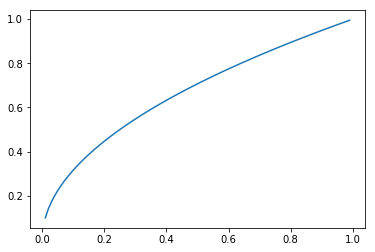

In [38]:
plt.plot(p, p_o)

In [67]:
0.3**5

0.0024299999999999994

In [66]:
(1-0.3)**5

0.16806999999999994

In [109]:
p_o_1 = (1-p)*-np.log(p)
p_o_2 = (1-p)**2*-np.log(p)
p_o_3 = -np.log(p)
p_o_4 = -0.5*np.log(p)-0.5*np.log(1-p)
p_o_5 = -np.log(p)-np.log(1-p)
# p_o_6 = -abs(0.5-p)**0.5*np.log(p)-abs(0.5-(1-p))**0.5*np.log(1-p)
p_o_6 = -(1-p)**5*np.log(p)-(1-(1-p))**5*np.log(1-p)
p_o_7 = -abs(0.5-p)**0.5*np.log(p)-abs(0.5-(1-p))**0.5*np.log(1-p)

In [111]:
from sympy import *

In [115]:
x = Symbol('a')
diff(-(1-x)**5*log(x)-(1-(1-x))**5*log(1-x))

a**5/(-a + 1) - 5*a**4*log(-a + 1) + 5*(-a + 1)**4*log(a) - (-a + 1)**5/a

In [116]:
x = Symbol('a')
diff(-(1-x)**0*log(x)-(1-(1-x))**0*log(1-x))

1/(-a + 1) - 1/a

In [120]:
x = Symbol('a')
diff(-abs(0.5-x)**0.5*log(x)-abs(0.5-(1-x))**0.5*log(1-x))

-0.5*((re(a) - 0.5)*Derivative(re(a), a) + im(a)*Derivative(im(a), a))*log(a)*Abs(a - 0.5)**(-1.5) - 0.5*((re(a) - 0.5)*Derivative(re(a), a) + im(a)*Derivative(im(a), a))*log(-a + 1)*Abs(a - 0.5)**(-1.5) + Abs(a - 0.5)**0.5/(-a + 1) - Abs(a - 0.5)**0.5/a

In [118]:
a = np.arange(0.01, 1., step=0.01)
p_o_1 = a**5/(-a + 1) - 5*a**4*np.log(-a + 1) + 5*(-a + 1)**4*np.log(a) - (-a + 1)**5/a
p_o_2 = 1/(-a + 1) - 1/a

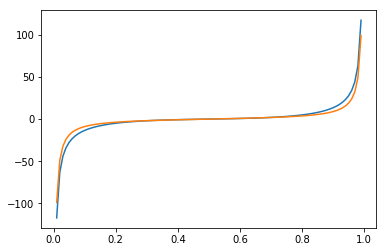

In [119]:
plt.plot(a, p_o_1)
plt.hold
plt.plot(a, p_o_2)

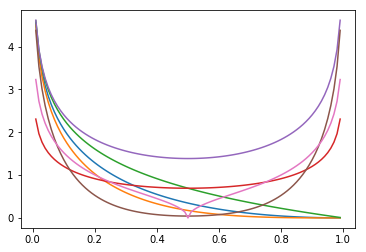

In [110]:
plt.plot(p, p_o_1)
plt.hold
plt.plot(p, p_o_2)
plt.hold
plt.plot(p, p_o_3)
plt.hold
plt.plot(p, p_o_4)
plt.hold
plt.plot(p, p_o_5)
plt.hold
plt.plot(p, p_o_6)
plt.hold
plt.plot(p, p_o_7)

<function matplotlib.pyplot.hold>

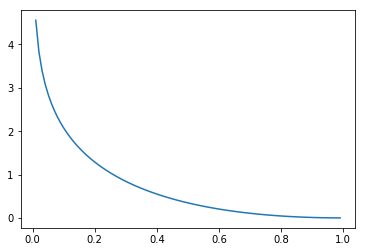

In [18]:
plt.plot(p, p_o)
plt.hold

In [94]:
g = torch.randn(128, 2)

In [91]:
g.size(0)

10

In [96]:
128 * 1 / 13

9.846153846153847

In [98]:
9 * 12 + 119

227

In [95]:
int(g.size(0) * 2 * (12) / (12+1))

236